In [2]:
import pyqg_subgrid_experiments as pse
from CGAN import *
import matplotlib.pyplot as plt
import json
import xarray as xr
import matplotlib.image as mpimg
from plot_helpers import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
folder = '/scratch/pp2681/pyqg_NN/27_May/'
exps = ('EXP1','EXP2', 'EXP3', 'EXP5', 'EXP6', 'EXP7', 'EXP8', 'EXP9', 'EXP10', 'EXP11', 'EXP12', 'EXP13', 'EXP14', 
       'EXP15', 'EXP17', 'EXP19', 'EXP20')

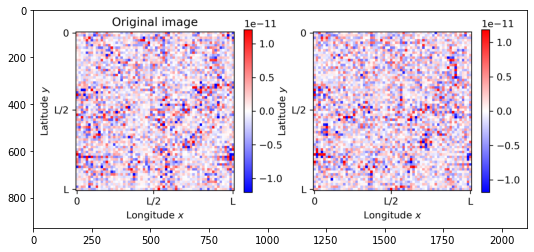

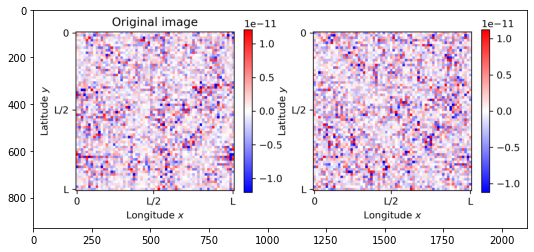

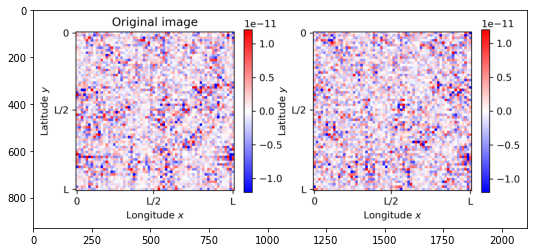

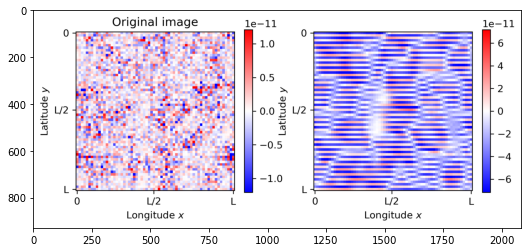

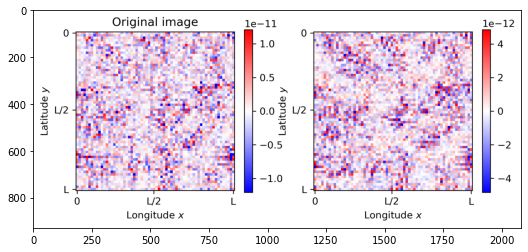

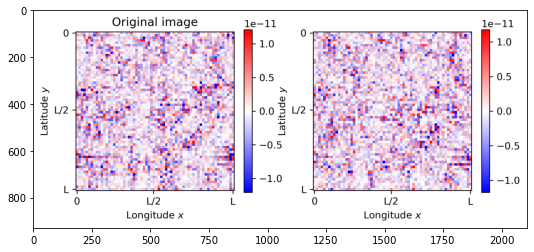

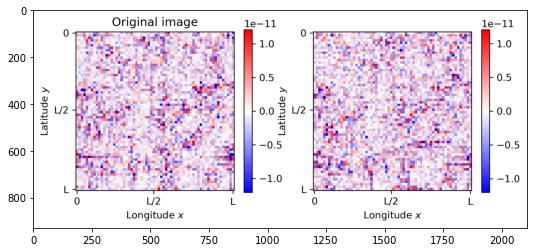

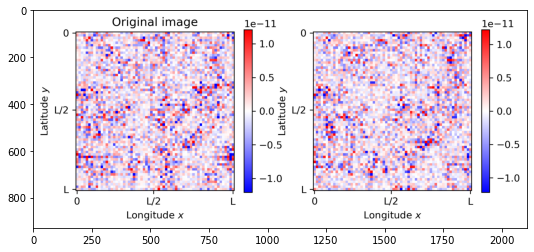

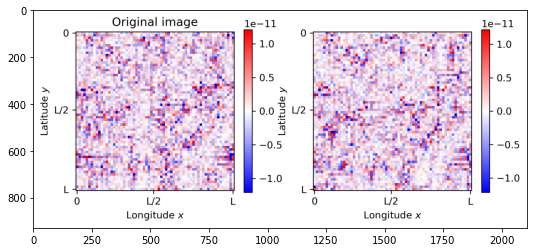

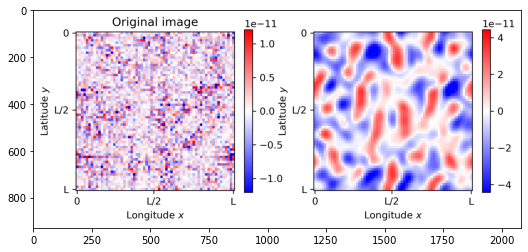

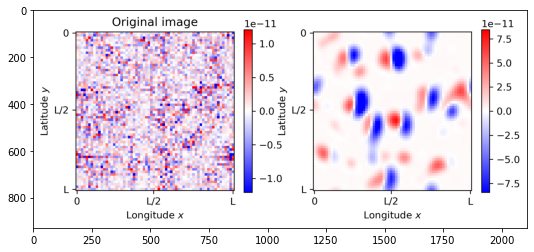

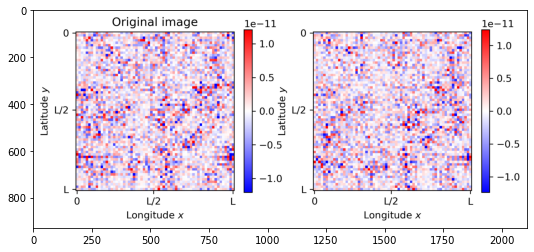

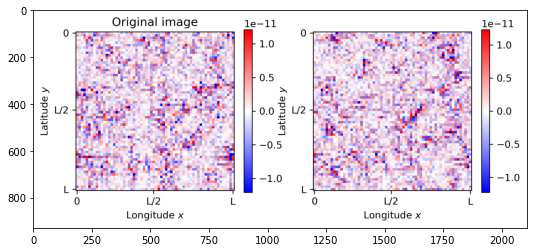

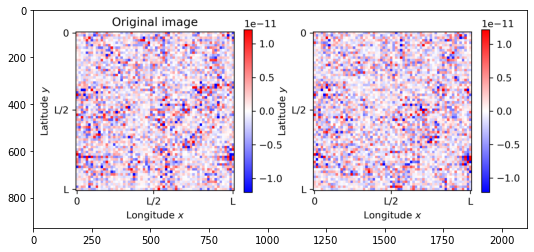

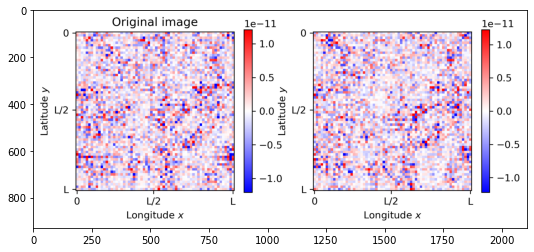

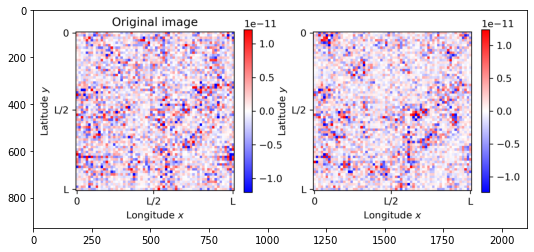

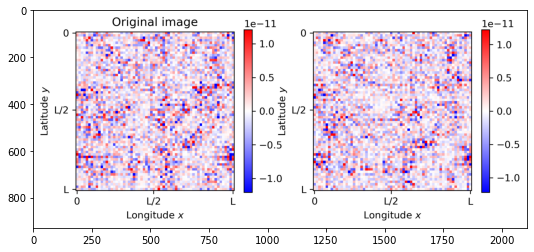

EXP1 {'num_epochs': 200, 'ensemble_size': 100, 'MSE_mean_alpha': 0.0, 'MSE_sample_alpha': 0.0, 'minibatch_discrimination': 0, 'deterministic': 1, 'loss_type': 'GAN', 'folder': '.', 'configuration': 'eddies'}
EXP2 {'num_epochs': 200, 'ensemble_size': 100, 'MSE_mean_alpha': 0.0, 'MSE_sample_alpha': 0.1, 'minibatch_discrimination': 0, 'deterministic': 1, 'loss_type': 'GAN', 'folder': '.', 'configuration': 'eddies'}
EXP3 {'num_epochs': 200, 'ensemble_size': 100, 'MSE_mean_alpha': 0.0, 'MSE_sample_alpha': 1.0, 'minibatch_discrimination': 0, 'deterministic': 1, 'loss_type': 'GAN', 'folder': '.', 'configuration': 'eddies'}
EXP5 {'num_epochs': 200, 'ensemble_size': 100, 'MSE_mean_alpha': 0.0, 'MSE_sample_alpha': 0.0, 'minibatch_discrimination': 1, 'deterministic': 1, 'loss_type': 'GAN', 'folder': '.', 'configuration': 'eddies'}
EXP6 {'num_epochs': 200, 'ensemble_size': 100, 'MSE_mean_alpha': 0.0, 'MSE_sample_alpha': 1.0, 'minibatch_discrimination': 1, 'deterministic': 1, 'loss_type': 'GAN', 'f

In [6]:
result = []
for exp in exps:
    result.append(read_experiment(folder+exp,show_image=True))

for j, exp in enumerate(exps):
    print(exp, result[j]['args'])    

In [82]:
def plot_train_loss(result, exp, plotter):
    optim_loss = result[exp]['model'].net.optim_loss
    plotter(optim_loss['Generator'], label='Generator loss')
    plotter(optim_loss['Discriminator'], label='Discriminator loss')
    plt.legend()
    plt.xlabel('Batch number')
    print(result[exp]['args'])

{'num_epochs': 200, 'ensemble_size': 100, 'MSE_mean_alpha': 0.0, 'MSE_sample_alpha': 0.0, 'minibatch_discrimination': 1, 'deterministic': 0, 'loss_type': 'WGAN', 'folder': '.', 'configuration': 'eddies'}


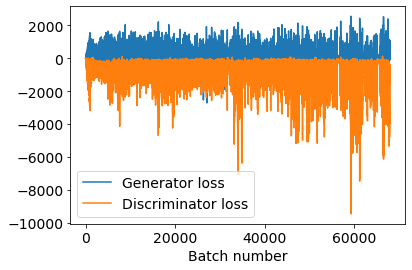

In [250]:
plot_train_loss(result,14, plt.plot)

{'num_epochs': 200, 'ensemble_size': 100, 'MSE_mean_alpha': 0.0, 'MSE_sample_alpha': 0.0, 'minibatch_discrimination': 1, 'deterministic': 0, 'loss_type': 'GAN', 'folder': '.', 'configuration': 'eddies'}
{'num_epochs': 200, 'ensemble_size': 100, 'MSE_mean_alpha': 0.0, 'MSE_sample_alpha': 0.0, 'minibatch_discrimination': 1, 'deterministic': 0, 'loss_type': 'WGAN', 'folder': '.', 'configuration': 'eddies'}


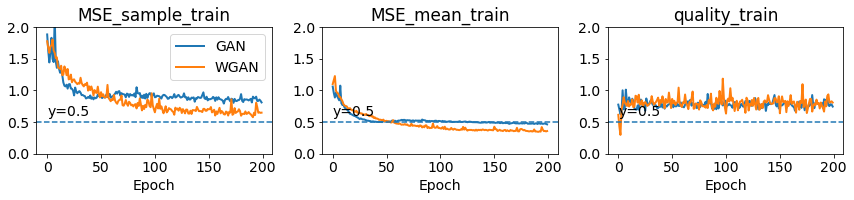

In [246]:
plot_lines(result, exps=(12,14), prop=('MSE_sample_train','MSE_mean_train', 'quality_train'), label='loss_type', ylim=(0,2), hline=0.5)

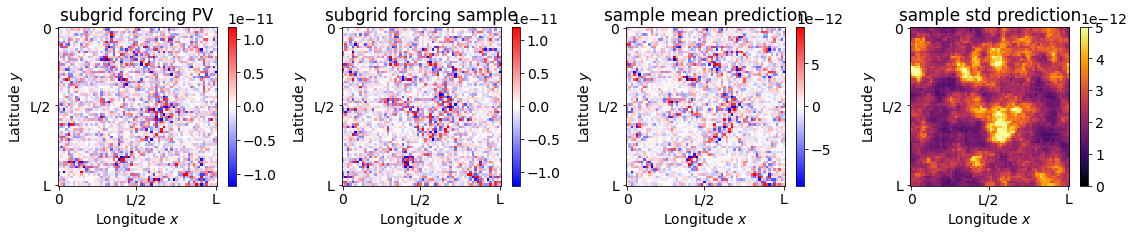

In [247]:
with pse.figure_grid(6,4) as g:
    for jfig in [14]:
        exp = result[jfig]['test']
        g.next('subgrid forcing PV')
        pse.imshow(exp.q_forcing_advection.isel(run=0,time=-1,lev=0))
        g.next('subgrid forcing sample')
        pse.imshow(exp.q_forcing_advection_gen.isel(run=0,time=-1,lev=0))
        g.next('sample mean prediction')
        pse.imshow(exp.q_forcing_advection_gen_mean.isel(run=0,time=-1,lev=0))
        g.next('sample std prediction')
        pse.imshow(exp.q_forcing_advection_gen_std.isel(run=0,time=-1,lev=0), vmin=0, vmax=5e-12)

In [181]:
def compute_MSE(ds):
    target = ds.q_forcing_advection
    val = ds.q_forcing_advection_gen
    mean = ds.q_forcing_advection_gen_mean
    error_val = target - val
    error_mean = target - mean
    error_val = (error_val**2).mean(dim=('run','y','x')) / (target**2).mean(dim=('run','y','x'))
    error_mean = (error_mean**2).mean(dim=('run','y','x')) / (target**2).mean(dim=('run','y','x'))
    return error_val, error_mean

In [191]:
e_val, e_mean = compute_MSE(result[14]['test'])

(0.0, 1.0)

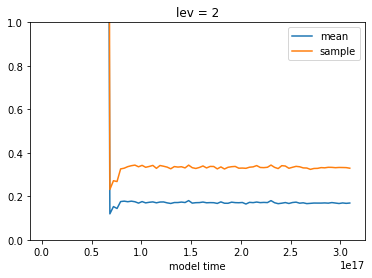

In [192]:
e_mean.isel(lev=1).plot(yscale='linear', label='mean')
e_val.isel(lev=1).plot(label='sample')
plt.legend()
plt.ylim([0,1])

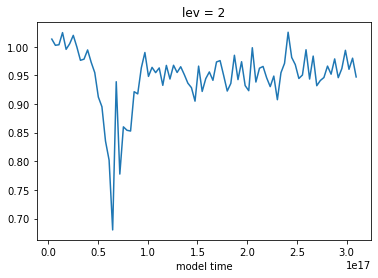

In [197]:
((e_val - e_mean) / e_mean).isel(lev=1).plot()

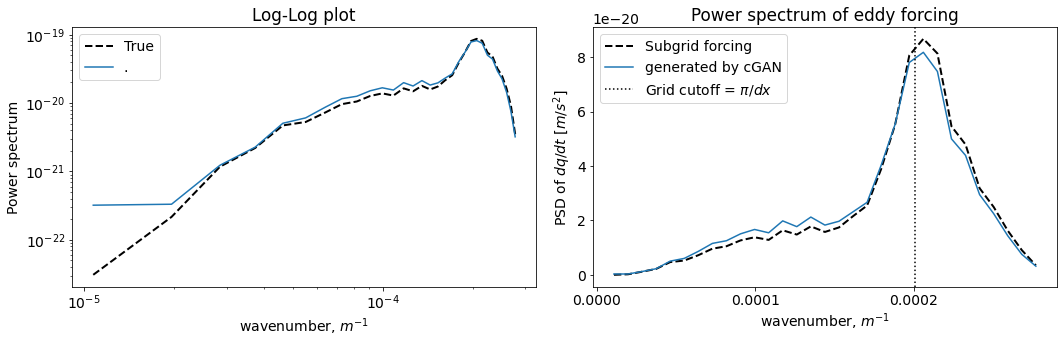

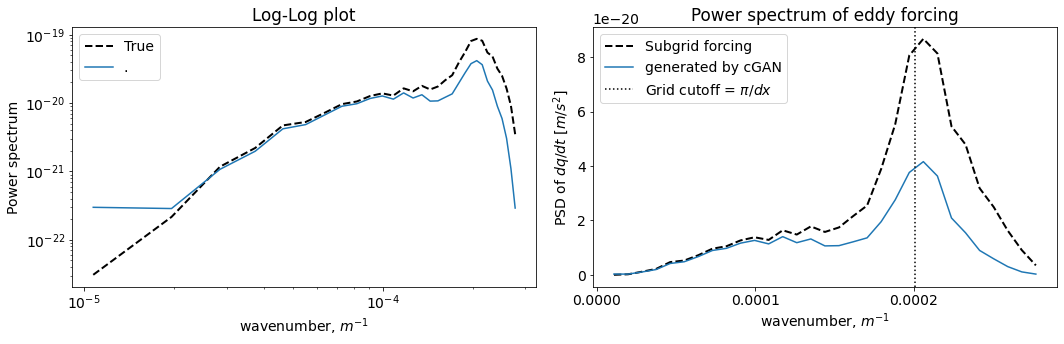

In [248]:
plot_spectra(result, [14,], label='folder', variable='q_forcing_advection', suffix='_gen')
plot_spectra(result, [14,], label='folder', variable='q_forcing_advection', suffix='_gen_mean')